100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.45MB/s]


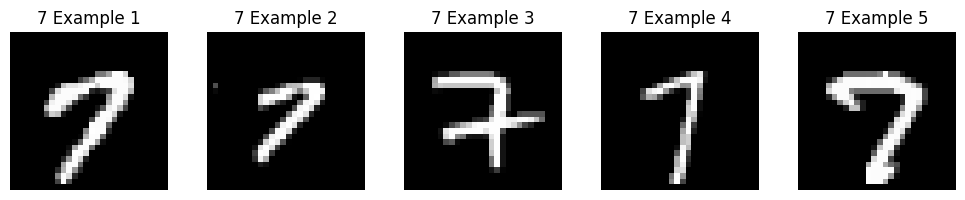

Epoch [1/10] - Train Loss: 0.3453, Train Acc: 0.9067 - Test Loss: 0.1851, Test Acc: 0.9455
Epoch [2/10] - Train Loss: 0.1572, Train Acc: 0.9551 - Test Loss: 0.1266, Test Acc: 0.9634
Epoch [3/10] - Train Loss: 0.1084, Train Acc: 0.9680 - Test Loss: 0.1023, Test Acc: 0.9707
Epoch [4/10] - Train Loss: 0.0821, Train Acc: 0.9755 - Test Loss: 0.0863, Test Acc: 0.9741
Epoch [5/10] - Train Loss: 0.0650, Train Acc: 0.9808 - Test Loss: 0.0792, Test Acc: 0.9756
Epoch [6/10] - Train Loss: 0.0515, Train Acc: 0.9845 - Test Loss: 0.0769, Test Acc: 0.9763
Epoch [7/10] - Train Loss: 0.0425, Train Acc: 0.9871 - Test Loss: 0.0677, Test Acc: 0.9796
Epoch [8/10] - Train Loss: 0.0346, Train Acc: 0.9897 - Test Loss: 0.0724, Test Acc: 0.9776
Epoch [9/10] - Train Loss: 0.0275, Train Acc: 0.9923 - Test Loss: 0.0726, Test Acc: 0.9770
Epoch [10/10] - Train Loss: 0.0242, Train Acc: 0.9929 - Test Loss: 0.0728, Test Acc: 0.9791


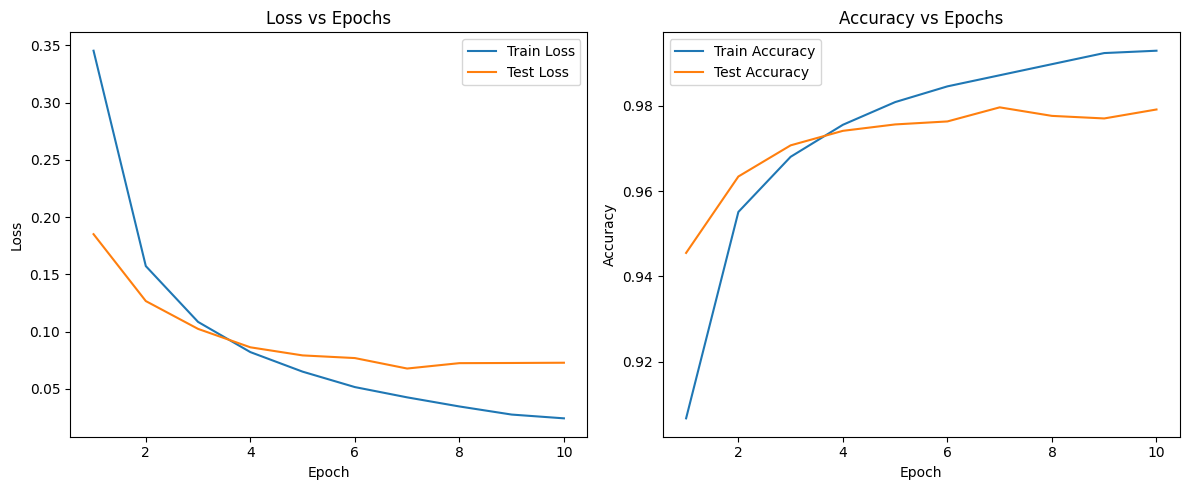

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

# MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Filter out digit '7'
sevens = [(img, label) for img, label in mnist_dataset if label == 7]

# Plot the first 5 '7' images
plt.figure(figsize=(10, 2))
for i in range(5):
    img, _ = sevens[i]
    plt.subplot(1, 5, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f'7 Example {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# To store metrics
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training and evaluation loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    # Evaluate on test data
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = running_loss / total
    test_acc = correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f} - "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Plot losses and accuracies
epochs = range(1, num_epochs+1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()